In [97]:
import numpy as np
from scipy.stats import norm
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
from matplotlib import mlab, cm

%matplotlib inline

import ipy_table

# Render figures with LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Set figure size
plt.rcParams['figure.figsize'] = (7.0, 5.0)

## Energy Relations in the Optical Cavity

#### Parameters:
- $\alpha_0$ absorption coefficient for internal losses
- $k_0$ wavevector of incident light
- $d$ cavity lenght
- $r_i, t_i\, (i=1,2)$ mirror reflectance and transmitance, respectively
- $\phi(\omega) = \omega_L \frac{2d}{c}+\cos^{-1}\left(\pm\sqrt{g_1 g_2}\right)$


- $g_i=1-d/C_i$ where $C_i$ is the curvature radius of the mirror.

In the following
$$
\Delta = \omega_L - \omega_0 \quad \rightarrow \quad \omega_L=\Delta+\omega_0 
$$
where $\omega_0$ is the frequency of $5^2 S_{1/2} \rightarrow  5^2 P_{3/2}$ transition $\left(384.230 484 468 5(62) \,\mathrm{THz}\right)$

$\newcommand{grt}{g_\mathrm{rt}}$
$\newcommand{mrm}[1]{\mathrm{#1}}$

### Passive lossy optical cavity

The round–trip optical path contains material with voltage absorption coefficient $\alpha_0$, the attenuation of the signal amplitude or signal voltage in one round–trip is $\exp(-2\alpha_0)$.

The net round–trip transmission factor, or *complex round–trip gain*, is
\begin{equation}
g_\mathrm{rt}(\omega_\mathrm{L}) \equiv r_1 r_2 \times \exp[-2\alpha_0-\mathrm{i}\phi(\omega_\mathrm{L})] .
\end{equation}

In the foregoing we consider the resonance condition $\phi(\omega)=0 \rightarrow g_\mathrm{rt} = r_1 r_2 \times \exp[-2\alpha_0]$.

####  Mirror reflectivities and Finesse $\mathcal{F}$ for matched–input condition

Matched input: $r_1^2 = g_\mathrm{rt}\rightarrow r_1 = r_2\exp[-2\alpha_0]$

Finesse: $\mathcal{F} = \pi \sqrt{g_\mathrm{rt}} \big/ (1-g_\mathrm{rt})$

In [12]:
# Round-trip loss
alpha = np.linspace(0,0.1,1000,endpoint=True)

# R2 = 0.99999
r2 = np.sqrt(0.99999)
r1_99999 = r2*np.exp(-2*alpha)  # matched input condition
F_99999 = np.pi*np.sqrt(r1_99999*r2*np.exp(-2*alpha))/(1-r1_99999*r2*np.exp(-2*alpha))    # Finesse

# R2 = 0.99
r2 = np.sqrt(0.99)
r1_99 = r2*np.exp(-2*alpha)     # matched input condition
F_99 = np.pi*np.sqrt(r1_99*r2*np.exp(-2*alpha))/(1-r1_99*r2*np.exp(-2*alpha))    # Finesse

# R2 = 0.95
r2 = np.sqrt(0.95)
r1_95 = r2*np.exp(-2*alpha)     # matched input condition
F_95 = np.pi*np.sqrt(r1_95*r2*np.exp(-2*alpha))/(1-r1_95*r2*np.exp(-2*alpha))    # Finesse

# R2 = 0.9
r2 = np.sqrt(0.90)
r1_9 = r2*np.exp(-2*alpha)     # matched input condition
F_9 = np.pi*np.sqrt(r1_9*r2*np.exp(-2*alpha))/(1-r1_9*r2*np.exp(-alpha))        # Finesse

[0, 0.2, 0, 50]

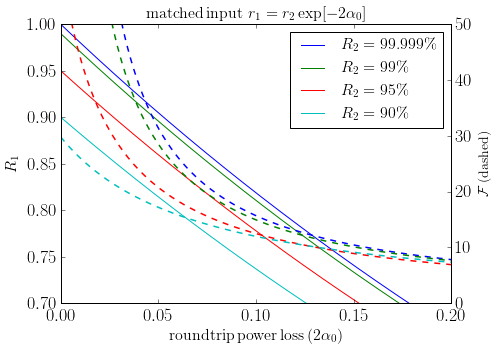

In [18]:
# Plot

fig, ax1 = plt.subplots()
ax1.plot(2*alpha,r1_99999**2,label=r'$R_2=99.999\%$')
ax1.plot(2*alpha,r1_99**2,label=r'$R_2=99\%$')
ax1.plot(2*alpha,r1_95**2,label=r'$R_2=95\%$')
ax1.plot(2*alpha,r1_9**2,label=r'$R_2=90\%$')
ax1.set_xlabel(r'$\mathrm{roundtrip\, power\, loss\,(2\alpha_0)}$', fontsize=16)
ax1.set_ylabel(r'$R_1$', fontsize=16)
plt.title(r'$\mathrm{matched\, input}\,\,r_1 = r_2\exp[-2\alpha_0]$', fontsize=16)
ax1.legend(fontsize=16)
ax1.axis([0,0.2,0.7,1])
for tl in ax1.get_yticklabels():
    tl.set_fontsize(18)
for tl in ax1.get_xticklabels():
    tl.set_fontsize(18)
ax1.tick_params(axis='x', which='major', pad=15)    

ax2 = ax1.twinx()
plt.plot(2*alpha,F_99999,'--',lw=1.5)
plt.plot(2*alpha,F_99,'--',lw=1.5)
plt.plot(2*alpha,F_95,'--',lw=1.5)
plt.plot(2*alpha,F_9,'--',lw=1.5)
ax2.set_ylabel(r'$\mathcal{F}\, \mathrm{(dashed)}$', fontsize=14)
for tl in ax2.get_yticklabels():
    tl.set_fontsize(18)
ax2.axis([0,0.2,0,50])

#plt.savefig('finesse.png')

Let the fraction of the *transmitted power* and the *circulating power after one round–trip* be
$$
\eta \equiv \frac{I_\mathrm{T}}{I_\mathrm{C}\mathrm{e}^{-4\alpha_0}} \leq 1.
$$

This will set the
- *transmittivity of the outcoupling mirror* $M_2$ as $t_2^2 = \eta$,
- *round–trip gain* $\grt = r_1\sqrt{1-\eta}e^{-2\alpha_0}$,
- *normalized transmitted power* $I_\mrm{T}\big/I_\mrm{0} = t_1^2\eta\big/ (1-\grt^2)$
- *Finesse* $\mathcal{F}=\pi\sqrt{\grt}\big/(1-\grt)$

in terms of $\eta$ and $r_1$

In [71]:
# fraction of the transmitted power and the circulating power after one round–trip
eta = 0.25

In [72]:
# Normalized transmitted power
def Itrans(alpha, R1, eta):
    grt = np.sqrt(R1)*np.sqrt(1-eta)*np.exp(-2*alpha)
    t1 = np.sqrt(1-R1)
    return eta*(t1/(1-grt))**2

# Finesse
def finesse(alpha, R1, eta):
    grt = np.sqrt(R1)*np.sqrt(1-eta)*np.exp(-2*alpha)
    return np.pi*np.sqrt(grt)/(1-grt)

# Round-trip loss
alpha = np.linspace(0,0.1,1000,endpoint=True)
# In-coupling mirror reflectivity
R1 = np.linspace(0.,1,1000,endpoint=False)

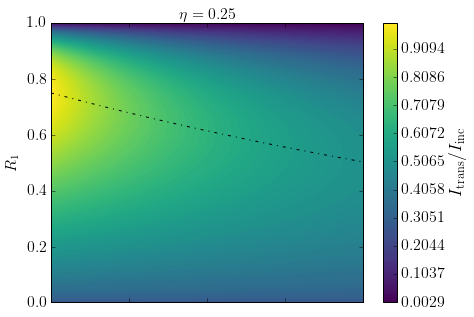

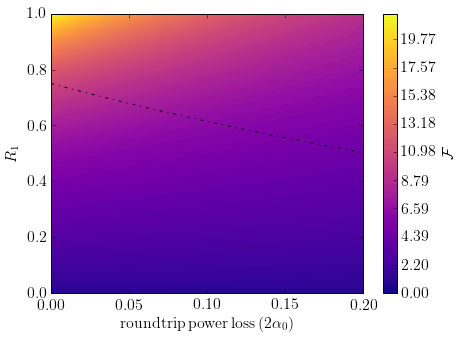

In [73]:
# Plotting

X,Y = np.meshgrid(alpha, R1)

Z1 = Itrans(X, Y, eta)
Z2 = finesse(X, Y, eta)

plt.figure()
plt.contourf(2*X,Y,Z1,levels=np.linspace(Z1.min(),Z1.max(),100),cmap=plt.cm.viridis)
ax1.set_xlabel(r'$\mathrm{round-trip\, power\, loss\,(2\alpha_0)}$', fontsize=16)
plt.ylabel(r'$R_1$', fontsize=16)
plt.title('$\eta = '+str(eta)+'$', fontsize=16)
plt.tick_params(labelsize=16,labelbottom=False)
cbar = plt.colorbar()
cbar.set_label(label=r'$I_\mathrm{trans}/I_\mathrm{inc}$',size=18)
cbar.ax.tick_params(labelsize=16) 
InputMatched = (1-eta)*np.exp(-4*alpha)
plt.plot(2*alpha,InputMatched,'k-.')

plt.figure()
plt.contourf(2*X,Y,Z2,levels=np.linspace(Z2.min(),Z2.max(),100),cmap=plt.cm.plasma)
plt.xlabel(r'$\mathrm{roundtrip\, power\, loss\,(2\alpha_0)}$', fontsize=16)
plt.ylabel(r'$R_1$', fontsize=16)
plt.tick_params(labelsize=16)
plt.tick_params(axis='x', which='major', pad=12)
cbar = plt.colorbar()
cbar.set_label(label=r'$\mathcal{F}$',size=16)
cbar.ax.tick_params(labelsize=16) 
plt.plot(2*alpha,InputMatched,'k-.')

for a particular value of the *round–trip loss*

In [74]:
# round-trip power loss
alpha = 0.02

In [75]:
R1 = np.linspace(0,1,1000)

grt = np.sqrt( R1*(1-eta) )*np.exp(-2*alpha)
trans = ((1 - R1)*eta)/(1-grt)**2
finesse = np.pi*np.sqrt(grt)/(1-grt)

Rmatched = (1-eta)*np.exp(-4*alpha)

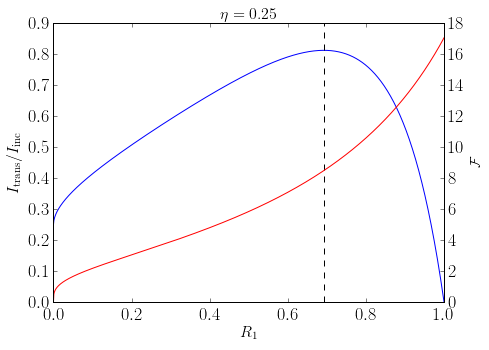

In [76]:
fig, ax1 = plt.subplots()
ax1.plot(R1,trans)
ax1.set_xlabel(r'$R_1$', fontsize=16)
ax1.set_ylabel(r'$I_\mathrm{trans}/I_\mathrm{inc}$', fontsize=16)
ax1.set_title(r'$\eta='+str(eta)+'$', fontsize=16)
#ax1.axis([0,1,0.,0.5])
plt.axvline(Rmatched,color='k',ls='dashed')
for tl in ax1.get_yticklabels():
    tl.set_fontsize(18)
for tl in ax1.get_xticklabels():
    tl.set_fontsize(18)
ax1.tick_params(axis='x', which='major', pad=15)
    
ax2 = ax1.twinx()
plt.plot(R1,finesse,'r-')
ax2.set_ylabel(r'$\mathcal{F}$', fontsize=14)
for tl in ax2.get_yticklabels():
    tl.set_fontsize(18)
#ax2.axis([0,1,0,25])

The *scattered power* is defined as
$$
I_\mrm{scat} \equiv I_\mrm{circ}(1-e^{-4\alpha_0}).
$$

Let $\chi$ be the ratio of the *scattered* and *transmitted power*
$$
\chi \equiv \frac{I_\mrm{scat}}{I_\mrm{trans}}\quad \rightarrow \quad \chi = \left(\frac{2e^{\alpha_0}}{t_2}\right)^2\sinh^2(\alpha_0)
$$

This will set the
- *transmittivity of the out–coupling mirror* $t_2$,
- everything else in term of the above.

In [52]:
chi = 1

In [51]:
# Normalized transmitted power
def Itrans(alpha, R1, chi):
    T2 = 4*np.exp(2*alpha)*np.sinh(alpha)**2/chi
    grt = np.sqrt(R1)*np.sqrt(1-T2)*np.exp(-2*alpha)
    T1 = 1-R1
    return T2*T1*np.exp(-4*alpha)/(1-grt)**2

# Finesse
def finesse(alpha, R1, chi):
    T2 = 4*np.exp(2*alpha)*np.sinh(alpha)**2/chi
    grt = np.sqrt(R1)*np.sqrt(1-T2)*np.exp(-2*alpha)
    return np.pi*np.sqrt(grt)/(1-grt)

# Round-trip loss
alpha = np.linspace(0,0.1,1000,endpoint=True)
# In-coupling mirror reflectivity
R1 = np.linspace(0.,1,1000,endpoint=False)

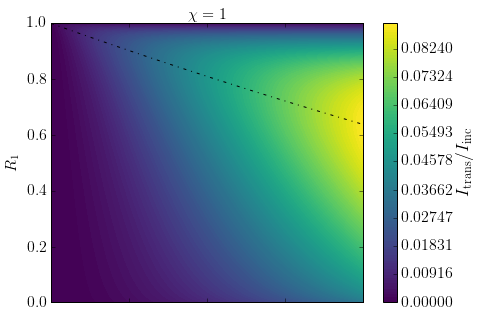

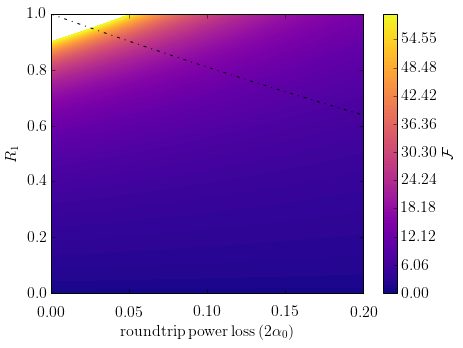

In [52]:
# Plotting

X,Y = np.meshgrid(alpha, R1)

Z1 = Itrans(X, Y, chi)
Z2 = finesse(X, Y, chi)

plt.figure()
plt.contourf(2*X,Y,Z1,levels=np.linspace(Z1.min(),Z1.max(),100),cmap=plt.cm.viridis)
#plt.xlabel(r'$\mathrm{round-trip\, power\, loss\,(2\alpha_0)}$', fontsize=16)
plt.ylabel(r'$R_1$', fontsize=16)
plt.title('$\chi = '+str(chi)+'$', fontsize=16)
plt.tick_params(labelsize=16,labelbottom=False)
cbar = plt.colorbar()
cbar.set_label(label=r'$I_\mathrm{trans}/I_\mathrm{inc}$',size=18)
cbar.ax.tick_params(labelsize=16) 
T2 = 4*np.exp(2*alpha)*np.sinh(alpha)**2/chi
InputMatched = (1-T2)*np.exp(-4*alpha)
plt.plot(2*alpha,InputMatched,'k-.')

plt.figure()
plt.contourf(2*X,Y,Z2,levels=np.linspace(Z2.min(),Z2.min()+60,100),cmap=plt.cm.plasma)
plt.xlabel(r'$\mathrm{roundtrip\, power\, loss\,(2\alpha_0)}$', fontsize=16)
plt.ylabel(r'$R_1$', fontsize=16)
plt.tick_params(labelsize=16)
plt.tick_params(axis='x', which='major', pad=12)
cbar = plt.colorbar()
cbar.set_label(label=r'$\mathcal{F}$',size=16)
cbar.ax.tick_params(labelsize=16) 
plt.plot(2*alpha,InputMatched,'k-.')

In [59]:
# round-trip power loss
alpha = 0.04

R1 = np.linspace(0,1,1000)

T2 = 4*np.exp(2*alpha)*np.sinh(alpha)**2/chi
T1 = 1-R1
grt = np.sqrt(R1)*np.sqrt(1-T2)*np.exp(-2*alpha)

trans = T2*T1*np.exp(-4*alpha)/(1-grt)**2
finesse = np.pi*np.sqrt(grt)/(1-grt)

Rmatched = (1-T2)*np.exp(-4*alpha)

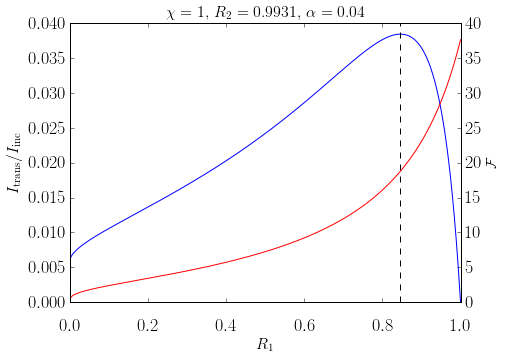

In [60]:
fig, ax1 = plt.subplots()
ax1.plot(R1,trans)
ax1.set_xlabel(r'$R_1$', fontsize=16)
ax1.set_ylabel(r'$I_\mathrm{trans}/I_\mathrm{inc}$', fontsize=16)
ax1.set_title(r'$\chi='+str(chi)+',\, R_2='+'{:.4f}'.format(1-T2)+r',\, \alpha='+'{:.2f}'.format(alpha)+'$', fontsize=16)
#ax1.axis([0,1,0.,0.03])
plt.axvline(Rmatched,color='k',ls='dashed')
for tl in ax1.get_yticklabels():
    tl.set_fontsize(18)
for tl in ax1.get_xticklabels():
    tl.set_fontsize(18)
ax1.tick_params(axis='x', which='major', pad=15)
    
ax2 = ax1.twinx()
plt.plot(R1,finesse,'r-')
ax2.set_ylabel(r'$\mathcal{F}$', fontsize=14)
for tl in ax2.get_yticklabels():
    tl.set_fontsize(18)
#ax2.axis([0,1,0,80])

In [56]:
print 'R1 = %.4f\nR2 = %.4f' %(Rmatched,1-T2)

R1 = 0.9216
R2 = 0.9983


In [61]:
chi_list = np.asarray([1,0.75,0.5,0.25,0.01])

# round-trip power loss
alpha = 0.04

T2 = 4*np.exp(2*alpha)*np.sinh(alpha)**2/chi_list
R1 = (1-T2)*np.exp(-4*alpha)*1.07
T1 = 1-R1
grt = np.sqrt(R1)*np.sqrt(1-T2)*np.exp(-2*alpha)

trans = T2*T1*np.exp(-4*alpha)/(1-grt)**2
finesse = np.pi*np.sqrt(grt)/(1-grt)

In [68]:
title = [r'$\chi$',r'$R_1$',r'$R_2$',r'$I_\mathrm{trans}/I_\mathrm{inc}\, (\%)$',r'$\mathcal{F}$']
table = [[title[0]]+list(chi_list),
         [title[1]]+list(R1),
         [title[2]]+list(1-T2),
         [title[3]]+list(trans*100),
         [title[4]]+list(finesse)]

ipy_table.make_table(table)
ipy_table.set_column_style(0, width='100', bold=True, color='hsla(225, 80%, 94%, 1)')
ipy_table.set_row_style(0,float_format='%0.2f')
ipy_table.set_row_style(1,float_format='%.4f')
ipy_table.set_row_style(3,float_format='%.2f')
ipy_table.set_row_style(4,float_format='%.d')
ipy_table.apply_theme('basic_left')

1


$\chi$,1.00,0.75,0.50,0.25,0.01
$R_1$,0.9055,0.9034,0.8991,0.8865,0.2793
$R_2$,0.9931,0.9908,0.9861,0.9723,0.3063
"$I_\mathrm{trans}/I_\mathrm{inc}\, (\%)$",3.60,4.75,6.97,13.13,79.95
$\mathcal{F}$,23,23,22,20,2


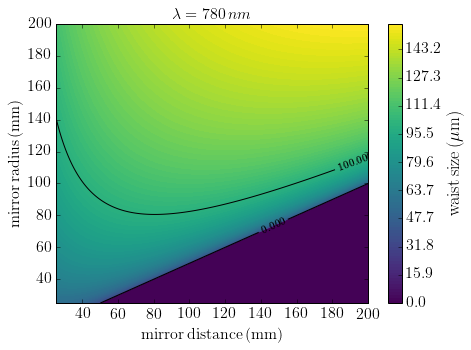

In [116]:
#wavelenght (mm)
wl = 780.033330e-12

def waistSize(d,C):
    g = 1-d/C
    g_safe = np.where( (1+g)/(4*(1-g)) >= 0,g,0)
    w0_2 = (wl*d/np.pi)*np.sqrt((1+g_safe)/(4*(1-g_safe)))
    return np.where(2*C>=d,np.sqrt(w0_2),0)

d = np.linspace(25,200,1000)
C = np.linspace(25,200,1000)

# Plotting

X,Y = np.meshgrid(d, C)

Z = waistSize(X, Y)

plt.figure()


cset1 = plt.contourf(X,Y,Z*1e6,
             levels=np.linspace(Z.min(),Z.max(),100)*1e6,
             cmap=cm.viridis)
cbar = plt.colorbar()

cset2 = plt.contour(X, Y, Z*1e6, levels=[0,100],
                colors='k',
                hold='on')
plt.clabel(cset2,level=[100],inline=1, fontsize=10)

plt.xlabel(r'$\mathrm{mirror\, distance\, (mm)}$', fontsize=16)
plt.ylabel(r'$\mathrm{mirror\, radius\, (mm)}$', fontsize=16)
plt.title('$\lambda = 780\, nm', fontsize=16)
plt.tick_params(labelsize=16)
cbar.set_label(label=r'$\mathrm{waist\, size\, (\mu m)}$',size=18)
cbar.ax.tick_params(labelsize=16) 